In [1]:
import ROOT

Welcome to JupyROOT 6.22/02


In [2]:
lumi = ROOT.RooRealVar("lumi" , "lumi" , 0 , 10000 )
lumiProfileMean = ROOT.RooConstVar("lumiProfileMean" , "" , 1000 )
lumiProfileSigma = ROOT.RooConstVar("lumiProfileSigma" , "" , 1 )
lumiProfile = ROOT.RooGaussian("lumiProfile" , "" , lumi , lumiProfileMean , lumiProfileSigma )


pu = ROOT.RooRealVar("nInt" , "nInt" , 0 , 100)
pu.setBins(100)

xsection = ROOT.RooRealVar("xsection" , "" ,  4000 , 6000)
deltaT = ROOT.RooConstVar("deltaT" , "deltaT" , 1.0/40000000 )

Lambda = ROOT.RooProduct("lambda" , "lambda" , ROOT.RooArgList(lumi , xsection , deltaT ) )
puForLumi = ROOT.RooPoisson("puForLumi" , "puForLumi" , pu , Lambda )

puProfileT = ROOT.RooProdPdf("puProfileT" , "puProfileT" , ROOT.RooArgList( lumiProfile , puForLumi )  )
puProfile = puProfileT.createProjection( ROOT.RooArgSet( lumi ) )


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



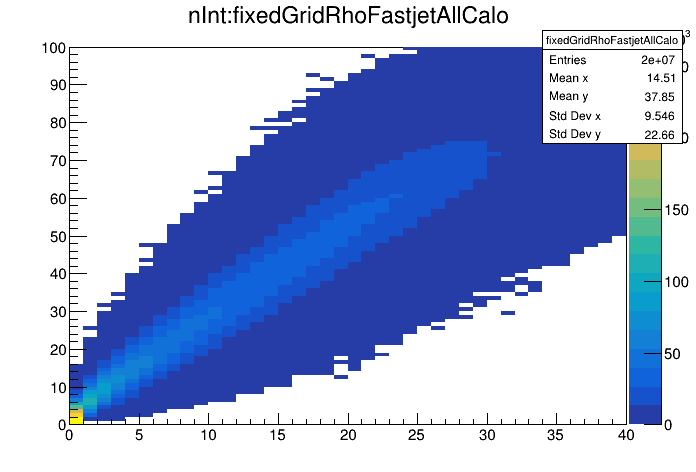

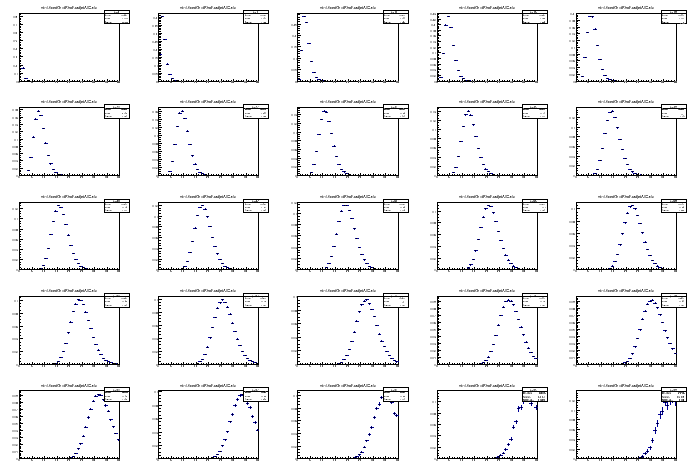

In [11]:
fSim = ROOT.TFile.Open("../../PU/out_2016_SingleNeutrinovsZeroBias_APV.root")
dirName = "SingleNuZeroBias/fixedGridRhoFastjetAllCalo/TuneCP1/latest/All/"
h2dVarPU = fSim.Get("{0}/{1}".format( dirName , "fixedGridRhoFastjetAllCalo"))

dataHist = ROOT.RooDataHist('dh_{0}'.format(h2dVarPU.GetName() ) , h2dVarPU.GetTitle() , )

c1 = ROOT.TCanvas()
h2dVarPU.Draw("COLZ")
c1.Draw()

c2 = ROOT.TCanvas()
c2.Divide(5,5)
for puvalue in range(100):
    if not puvalue % 4:
        continue
    c2.cd(puvalue/4+1)
    h1d = h2dVarPU.ProjectionX("pu{0}".format(puvalue) , puvalue , puvalue+1)
    h1d.Scale( 1.0 / h1d.Integral())    
    h1d.Draw()
c2.Draw()

In [12]:
#conditional pdf in roofit
#1. https://root.cern.ch/doc/master/classRooProdPdf.html
#2. https://root-forum.cern.ch/t/conditional-pdfs-in-roofit/5144
#5. https://root.cern/doc/v610/rf307__fullpereventerrors_8C_source.html